In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_gray = plt.imread(r'albert-einstein_gray.jpg')
img_binary = plt.imread(r'binary.jpg')

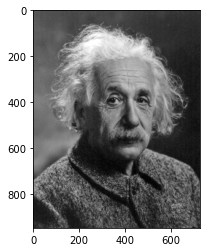

In [3]:
plt.imshow(img_gray,cmap='gray')

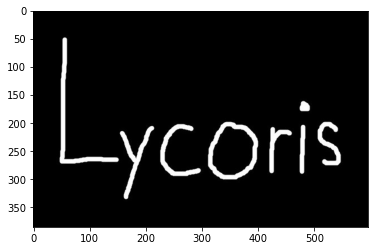

In [4]:
plt.imshow(img_binary)

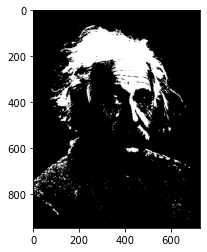

In [5]:
th = 150
im2 = img_gray>th
plt.imshow((im2),cmap='gray')

In [6]:
np.unique(im2)

array([False,  True])

## Structural Element Kernel

rectangle

In [7]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

In [8]:
type(K_r)

numpy.ndarray

In [9]:
K_r.dtype

dtype('uint8')

In [10]:
print(K_r)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


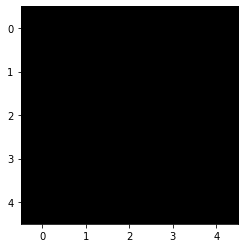

In [11]:
plt.imshow((K_r),cmap='gray')

elipse

In [12]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

In [13]:
K_e

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

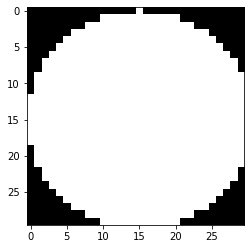

In [14]:
plt.imshow((K_e),cmap='gray')

cross

In [15]:
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

In [16]:
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

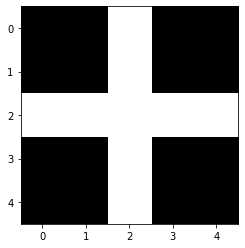

In [17]:
plt.imshow((K_c),cmap='gray')

## Erosion Theory

In [18]:
E_r = cv2.erode(img_binary,K_r)
E_e = cv2.erode(img_binary,K_e)
E_c = cv2.erode(img_binary,K_c)

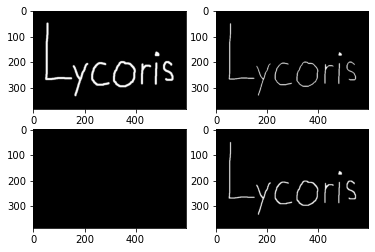

In [19]:
plt.subplot(221)
plt.imshow(img_binary)
plt.subplot(222)
plt.imshow(E_r)
plt.subplot(223)
plt.imshow(E_e)
plt.subplot(224)
plt.imshow(E_c)
plt.show()

## Dilation Theory

In [20]:
D_r = cv2.dilate(img_binary,K_r)
D_e = cv2.dilate(img_binary,K_e)
D_c = cv2.dilate(img_binary,K_c)

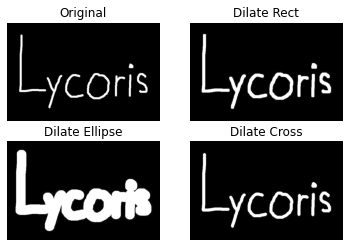

In [21]:
plt.subplot(221)
plt.imshow(img_binary)
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(D_r)
plt.title("Dilate Rect")
plt.axis('off')
plt.subplot(223)
plt.imshow(D_e)
plt.title("Dilate Ellipse")
plt.axis('off')
plt.subplot(224)
plt.imshow(D_c)
plt.title("Dilate Cross")
plt.axis('off')
plt.show()

## Opening

In [22]:
bina = plt.imread(r'Untitled.jpg')

(-0.5, 371.5, 533.5, -0.5)

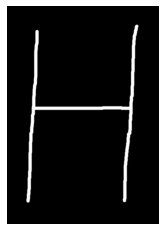

In [23]:
plt.imshow(bina)
plt.axis('off')

In [24]:
im_bool = np.array(bina[:,:,0],dtype=bool)

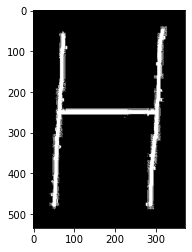

In [25]:
plt.imshow(im_bool,cmap='gray')

In [26]:
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [27]:
N_binary = N > 0.85 # create noise points

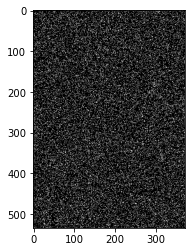

In [28]:
plt.imshow(N_binary,cmap='gray') 

In [29]:
img_N = im_bool | N_binary

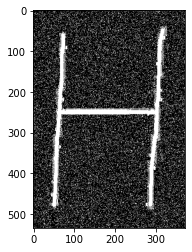

In [30]:
plt.imshow(img_N,cmap='gray')

In [31]:
Opening_r = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,K_r)

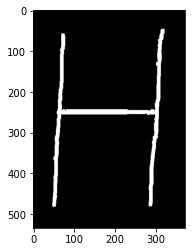

In [32]:
plt.imshow(Opening_r,cmap='gray')

## Closing

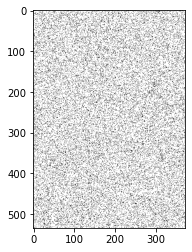

In [33]:
N_binary = N<0.85
plt.imshow(N_binary,cmap='gray')

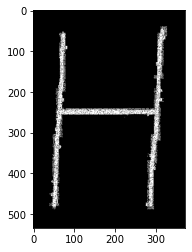

In [34]:
img_H = im_bool & N_binary
plt.imshow(img_H,cmap='gray')

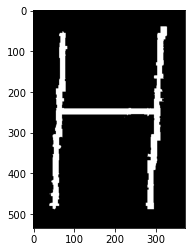

In [35]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,K_r)
plt.imshow(C_r,cmap='gray')